## Example (Iris Dataset)

### Naive Bayes, Logistic Regression, Decision Trees

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Data/Iris/Iris-cleaned.csv')
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
df = df.sample(frac = 1.0, random_state=0).reset_index(drop=True)
attributes = df.drop(['species'], axis = 1) #continuous -> one hot encode
target = df.species.astype('category')

In [4]:
attributes.shape

(150, 4)

In [5]:
target.shape

(150,)

In [4]:
#bin attributes into three categories (S) short, (M) medium, (L) large
for k in range(attributes.shape[1]):
    attributes.iloc[:,k] = pd.qcut(attributes.iloc[:,k], q = 3, labels=["S", "M", "L"])
attributes.head(10)

,sepal length,sepal width,petal length,petal width
0,M,S,L,L
1,M,S,M,M
2,M,L,S,S
3,L,S,L,L
4,S,L,S,S
5,M,L,L,L
6,S,L,S,S
7,L,M,M,M
8,L,S,M,M
9,M,S,M,M


In [5]:
#one hot encode
attributes = pd.get_dummies(attributes)
attributes.head(3)

,sepal length_S,sepal length_M,sepal length_L,sepal width_S,sepal width_M,sepal width_L,petal length_S,petal length_M,petal length_L,petal width_S,petal width_M,petal width_L
0,0,1,0,1,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0,0,1,0,0


### Naive Bayes

In [6]:
hparam = {'alpha': [10**(-5),0.1,0.2,0.3,0.4,0.5]}

In [7]:
NBayes = MultinomialNB()

In [8]:
NBayesCV = GridSearchCV(NBayes,param_grid=hparam,n_jobs=-1) 

In [9]:
NBayesCV.fit(attributes,target)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.1, 0.2, 0.3, 0.4, 0.5]})

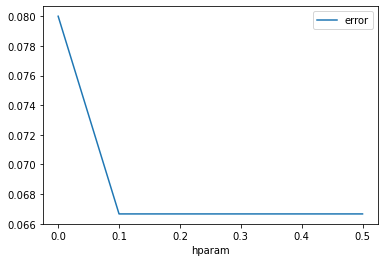

In [10]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results.plot.line(x='hparam', y='error')

In [11]:
results.head(3)

,hparam,error
0,0.00001,0.080000
1,0.10000,0.066667
2,0.20000,0.066667


In [12]:
NBayesCV.best_params_

{'alpha': 0.1}

In [13]:
error_bayes = 1- NBayesCV.best_score_
print('Naive Bayes error rate:', error_bayes.round(2))

Naive Bayes error rate: 0.07


In [14]:
prob = NBayesCV.best_estimator_.predict_proba(attributes)
classes = NBayesCV.best_estimator_.classes_
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
prob = pd.DataFrame(prob, columns=classes)
pd.concat([df,prob],axis=1).head(3).round(2)

,sepal length,sepal width,petal length,petal width,species,setosa,versicolor,virginica
0,5.8,2.8,5.1,2.4,virginica,0.0,0.01,0.99
1,6.0,2.2,4.0,1.0,versicolor,0.0,1.00,0.00
2,5.5,4.2,1.4,0.2,setosa,1.0,0.00,0.00


### Logistic Regression(It is a classifier)

In [16]:
lgr = LogisticRegression()

In [17]:
hparam = {'C':[0.01,0.1,1,10,100]}

In [18]:
lgrCV = GridSearchCV(lgr,param_grid=hparam) 

In [19]:
lgrCV.fit(attributes,target)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

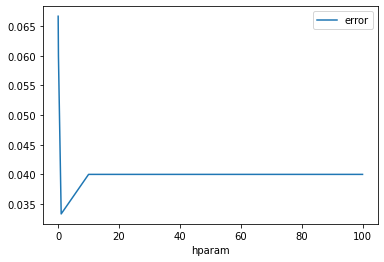

In [20]:
results = pd.DataFrame()
results['hparam'] = hparam['C']
results['error'] = 1 - lgrCV.cv_results_['mean_test_score']
results.plot.line(x='hparam', y='error')

In [21]:
results.head(3)

,hparam,error
0,0.01,0.066667
1,0.10,0.060000
2,1.00,0.033333


In [22]:
lgrCV.best_params_

{'C': 1}

In [23]:
prob = lgrCV.best_estimator_.predict_proba(attributes)
classes = lgrCV.best_estimator_.classes_
prob = pd.DataFrame(prob, columns=classes)
pd.concat([df,prob],axis=1).head(3).round(2)

,sepal length,sepal width,petal length,petal width,species,setosa,versicolor,virginica
0,5.8,2.8,5.1,2.4,virginica,0.00,0.01,0.99
1,6.0,2.2,4.0,1.0,versicolor,0.01,0.95,0.05
2,5.5,4.2,1.4,0.2,setosa,0.94,0.02,0.03


In [24]:
error_logistic = 1- lgrCV.best_score_
print('Logistic Regression error rate:', error_bayes.round(2))

Logistic Regression error rate: 0.07


### Decision Tree

In [25]:
hparam = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [26]:
Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = hparam) 
TreeCV.fit(attributes,target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

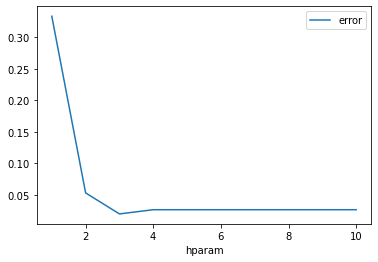

In [27]:
results = pd.DataFrame()
results['hparam'] = hparam['max_depth']
results['error'] = 1 - TreeCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [28]:
results.head(3)

,hparam,error
0,1,0.333333
1,2,0.053333
2,3,0.020000


In [29]:
TreeCV.best_params_

{'max_depth': 3}

In [30]:
prob = TreeCV.best_estimator_.predict_proba(attributes)
classes = TreeCV.best_estimator_.classes_
classes
prob = pd.DataFrame(prob,columns=classes)
prob.head(3).round(2)
pd.concat([df,prob],axis=1).head(3).round(2)

,sepal length,sepal width,petal length,petal width,species,setosa,versicolor,virginica
0,5.8,2.8,5.1,2.4,virginica,0.0,0.0,1.0
1,6.0,2.2,4.0,1.0,versicolor,0.0,1.0,0.0
2,5.5,4.2,1.4,0.2,setosa,1.0,0.0,0.0


In [31]:
error_tree = 1 - TreeCV.best_score_
error_tree

0.019999999999999907

In [32]:
error_bayes

0.06666666666666665

In [33]:
error_logistic

0.033333333333333215